In [70]:
#Checkpoint Question

#1.Explore this dataset using what you have learned in data preprocessing and data visualization - done

#2. Write a paragraph selecting the most important features (feature selection) - done

#3. Split your dataset into a training set and a testing set - done

#4. Apply Linear regression to your training set. done

#6. Plot the linear regression. - done

#7. Measure the performance of linear regression using the testing set. - done

#8. Apply multi-linear regression and compare it to the linear model. - done

#9. Apply Polynomial regression and compare it to linear and multilinear regression. - done

#Note: Every result has to be interpreted and justified (write your interpretations in a markdown). - done

In [71]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [72]:
#import data 
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [73]:
#Data information: historic data of houses sold between May 2014 and May 2015.  

#date: Date house was sold(String)

#price: Price of the sold house (important)

#bedrooms: Numer of Bedrooms (total number of rooms?)

#bathrooms: Numer of bathrooms

#sqft_living: Square footage of the living room

#sqrt_log: Square footage of the log

#floors: Total floors in the house (Yes!)

#waterfront: Whether the house has a view a waterfront(1: yes, 0: not)

#view: unknown

#condtion: Condition of the house

#grade:Represents the construction quality of improvements. Grades run from grade 1 to 13.

#sqft_above: Square footage of house apart from basement

#sqft_basement: Square footage of the basement

#yr_built: Built year (interesting...)

#yr_renovated: Year when the house was renovated

#zipcode: zipcode of the house

#lat: Latitude coordinate

#long Longitude coordinate

#sqft_living15: Living room area in 2015(implies some renovations)

#sqrt_lot15: Lot area in 2015(implies some renovations)

In [74]:
#Check for NaN 
df.isnull().sum().sum()

0

In [75]:
#Check for NaN 
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [76]:
#explore the data further
#bathrooms is flaot, keep that in mind if chosen later 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [77]:
#Although zipcode is an interesting feature to look at, I will not be using it. 
df.drop(['id', 'date', 'waterfront', 'zipcode', 'long'], axis=1, inplace=True)

In [78]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,47.5112,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,47.7210,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,47.7379,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,47.5208,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,47.6168,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,0,47.6993,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,0,47.5107,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,0,47.5944,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,0,47.5345,1410,1287


In [79]:
#explore the data further
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,6210.000000,871200.000000


In [80]:
#I want to check the number of grades... so from 1-13. 
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [81]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,47.5112,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,47.7210,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,47.7379,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,47.5208,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,47.6168,1800,7503


<AxesSubplot:>

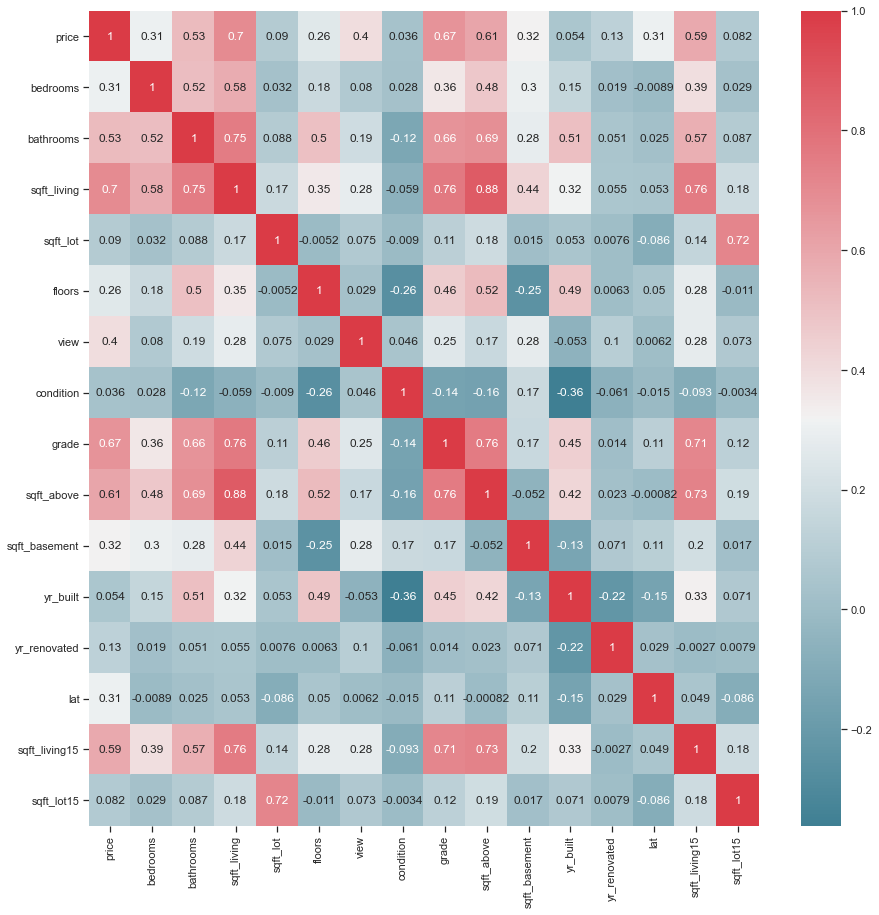

In [82]:
#use headmap to check for significant values 
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))

#In order to predict the price of the houses, I choose price feature. 
#Looking at the heatmap, we have a positive relationship between price and bathrooms, sqft_living and grade
#What I will choose to do is predict the price based on the number of bathrooms in the house. 
#Another possibility since it is (0.7), is predicting the price based on the sqft_living. 
#I will explore both out of sheer curiousty :) 

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

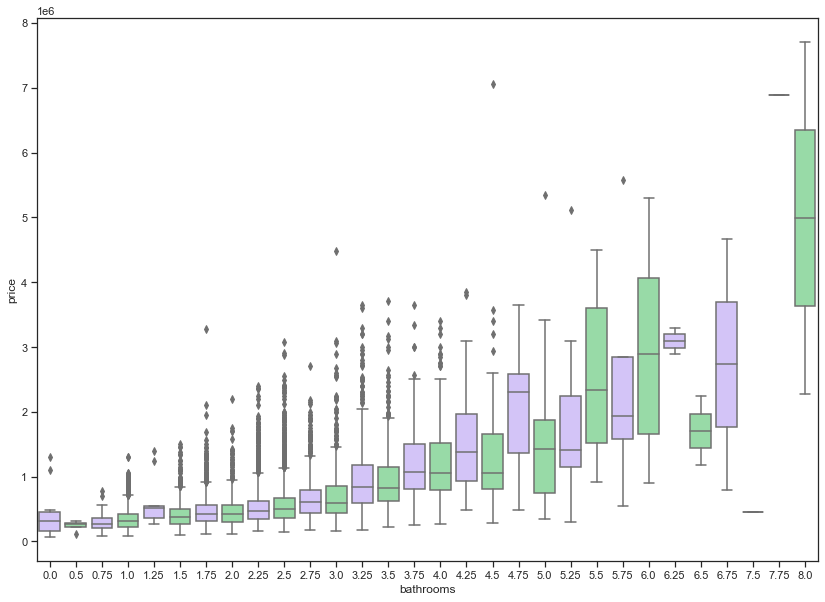

In [83]:
#looking at bathrooms and price. 
#There is a connection between them. As the number of bathroom increases, the price does as well. 
sns.set(style='ticks',palette='pastel')
fig, ax = plt.subplots(figsize=(14,10)) 
sns.boxplot(x='bathrooms',y='price',palette=["m", "g"], data=df,ax=ax)

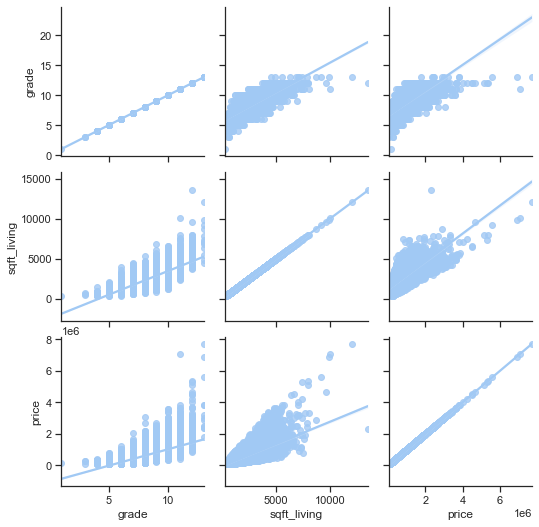

In [84]:
#Comparing price/grade Vs price/sqft_living 
g = sns.PairGrid(df[['grade','sqft_living', 'price']])
g.map(sns.regplot)

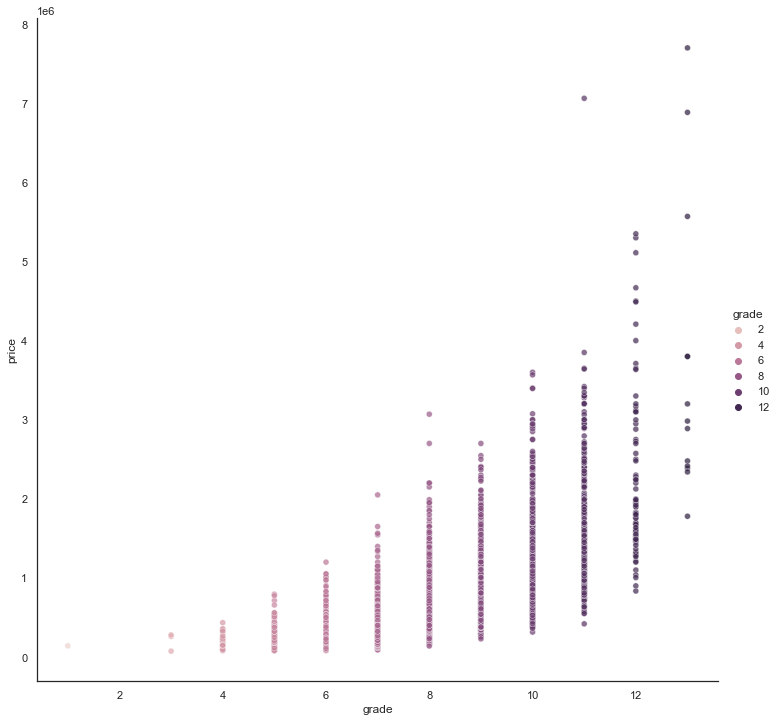

In [85]:
#grade and prices
sns.set(style='white')
sns.relplot(x='grade',y='price',hue='grade',alpha=0.7,height=10,data=df)

In [86]:
#importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [87]:
#I will predict the price based on the sqft_living. To train the model, I will split it into train and test 20/80
#the R sqaured is 0.5 which means half of the output variation can be explained by the model's input 
#though the model accuracy is not that great... that is probably because one variable is not enough to predict the prices.
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
print("train Accuracy",model.score(x,y))
print("test Accuracy",model.score(x,y))

MSE 62451720102.954
R squared 0.5035535751151091
train Accuracy 0.49283244336268217
test Accuracy 0.49283244336268217


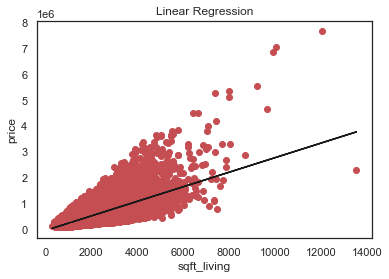

In [88]:
#The plot shows the best fit line for prediction 
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [98]:
#this explains half of the output by the model's input  
#the results are slightly better, however, the MSE decreased significantly which means the errors are WAY less. 

x=df[["sqft_living","grade"]]  #we have more than one input
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
print("train Accuracy",model.score(x,y))
print("test Accuracy",model.score(x,y))

MSE 57413775762.86427
R squared 0.5433112989852685
train Accuracy 0.5343999435654585
test Accuracy 0.5343999435654585


In [90]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [99]:
#Polynomial Regression
#Interesting results as the MSE dropped even lower and the R squared increased which means errors are less. 
#Still the accuracy is not that grade yet. 

x= df[["sqft_living", "grade"]]
y= df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))
print("train Accuracy",model.score(x,y))
print("test Accuracy",model.score(x,y))

MSE:  50395735085.91668
R squared:  0.599135181630813
train Accuracy 0.5343999435654585
test Accuracy 0.5343999435654585



#linear_regression_results 
MSE 62451720102.954
R squared 0.5035535751151091
train Accuracy 0.49283244336268217
test Accuracy 0.49283244336268217 

#Multi_linear_regression_results

MSE 57413775762.86427
R squared 0.5433112989852685
train Accuracy 0.5343999435654585
test Accuracy 0.5343999435654585

#polynomial_regression_results

MSE:  50395735085.91668
R squared:  0.599135181630813
train Accuracy 0.5343999435654585
test Accuracy 0.5343999435654585


#comparison between linear regression and multi linear regression

When we use linear regression, we feed our model one variable to predict the outcome we want. As I chose to predict the 
price based on the sqft_living, the accuracy of the model was not that good as it scored "0.49". However, the R squared 
was 0.5 which means it could predict half of the variations can be explained by the input. On the other hand, multi-linear
regression gave better results as I used two variables to predict the price which are sqft_living and grade. This improved the accuracay score from 0.49 to 0.53. Although it is not as good as I wanted it to be, it does prove that linear regression may not be the best choice to predict the prices of the houses as there is more than one factor that affects how expensive the house is. It is simply unrealistic to expect the model to be accuarte when only one variable is used to predict the price. Overall, multi-linear regression gave better results as we fed the model more variables to help it predict the price. 


#comparison between polynomialm multi linear regression and linear regression 

It is interesting to see the train and test accuracy of both polynomail and multi-linear regression scoring EXACTLY the same, but the MSE is less and the R squared is higher. There is a huge difference between the MSE of linear regression (62451720102.954), multi-linear regression (57413775762.86427) and polynomial regression (50395735085.91668). The smaller the number is, the less errors there will be. As for the R squared, instead of half it almost reached 0.6 which also means the results are better. Overall, regardless of the accuracy score of the polynomial regression which was the same as multi-regression, the MSE and R squared of the polynomial regression are much better than the others which means errors are way less! 
